In [1]:
from sklearn.cluster import KMeans
import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
from PIL import Image

This is the very beginning of my attempt to do synaptic cleft analysis. At that time I was so naive and unfamiliar with python and pythonic module, so many code and functions here might be really wierd. However, there WERE indeed some good try, like the minimum bounding box and 2D skeleton. Here also include SIFT, 3D skeleton and plot smoothing, I didn't delete them in case these naive exploration might be needed one day.

# (1) import clefts

In [2]:
cd /home/siyan/projects/cluster

/home/siyan/projects/cluster


In [3]:
with h5py.File('data/cremi/gt-syn/syn_A_v2_200.h5','r') as f:
    cleftsA = f['main'][:]

In [134]:
cleftsA.shape

(153, 1842, 1727)

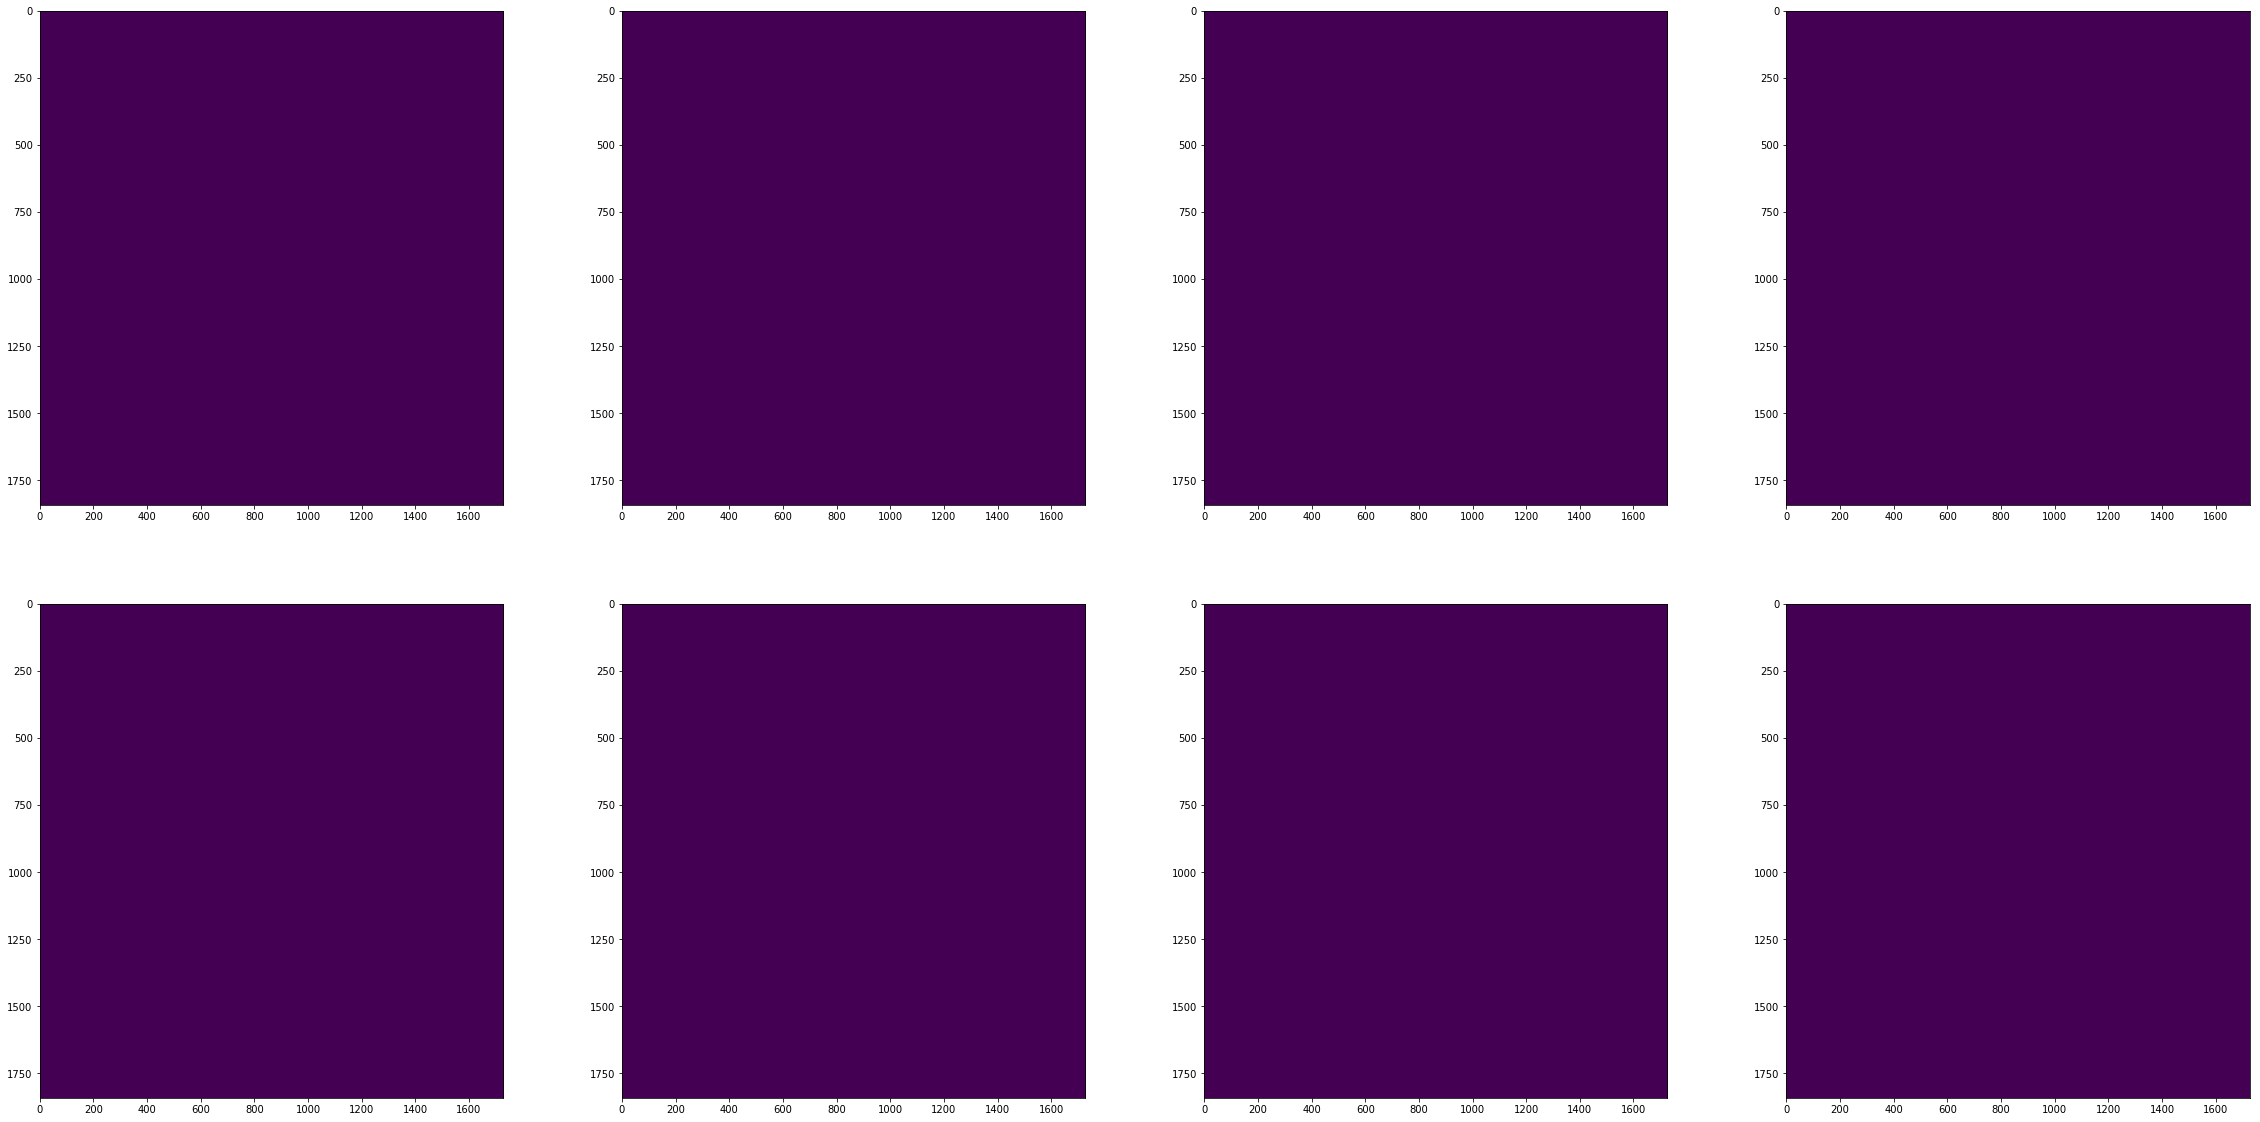

In [135]:
fig,ax = plt.subplots(2,4,figsize = (40,20))
for i in range(2):
    for j in range(4):
        ax[i,j].imshow(cleftsA[0+4*i+j])

In [137]:
np.unique(cleftsA,return_counts=True)

(array([  0, 604, 741, 743, 744, 745, 746, 747, 748, 749, 750, 752, 753,
        754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 766, 767,
        768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780,
        781, 782, 783, 786, 788, 789, 790, 791, 792, 793, 794, 795, 796,
        797, 799, 800, 801, 802, 803, 804, 805, 807, 808, 809, 810, 811,
        812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825,
        828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840,
        841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853,
        854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866,
        867, 869, 870, 874, 878, 881, 884], dtype=uint16),
 array([486272903,      4046,      1108,       516,       820,      1089,
             1762,       647,      2781,      4681,       452,      1736,
             1247,      3133,      1330,      1607,      7189,      3095,
             9812,      4796,      2580,     11865,      7189,

# (2) connected region detection

In [4]:
from skimage.measure import label

In [5]:
lb = label(input=cleftsA, background=0, connectivity=2, return_num=True)

In [6]:
lb

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [7]:
l = []
for i in range(153):
    for j in range(1842):
        for k in range(1727):
            if lb[0][i,j,k] == 1:
                l.append([i,j,k])

In [11]:
len(l)

1330

In [9]:
l

[[14, 230, 1081],
 [14, 230, 1082],
 [14, 230, 1083],
 [14, 230, 1084],
 [14, 230, 1085],
 [14, 230, 1086],
 [14, 230, 1087],
 [14, 230, 1088],
 [14, 230, 1089],
 [14, 230, 1090],
 [14, 230, 1091],
 [14, 230, 1092],
 [14, 230, 1093],
 [14, 231, 1078],
 [14, 231, 1079],
 [14, 231, 1080],
 [14, 231, 1081],
 [14, 231, 1082],
 [14, 231, 1083],
 [14, 231, 1084],
 [14, 231, 1085],
 [14, 231, 1086],
 [14, 231, 1087],
 [14, 231, 1088],
 [14, 231, 1089],
 [14, 231, 1090],
 [14, 231, 1091],
 [14, 231, 1092],
 [14, 231, 1093],
 [14, 232, 1075],
 [14, 232, 1076],
 [14, 232, 1077],
 [14, 232, 1078],
 [14, 232, 1079],
 [14, 232, 1080],
 [14, 232, 1081],
 [14, 232, 1082],
 [14, 232, 1083],
 [14, 232, 1084],
 [14, 232, 1085],
 [14, 232, 1086],
 [14, 232, 1087],
 [14, 232, 1088],
 [14, 232, 1089],
 [14, 232, 1090],
 [14, 232, 1091],
 [14, 232, 1092],
 [14, 232, 1093],
 [14, 233, 1064],
 [14, 233, 1065],
 [14, 233, 1066],
 [14, 233, 1067],
 [14, 233, 1068],
 [14, 233, 1069],
 [14, 233, 1070],
 [14, 233,

In [12]:
n = np.array(l)
n = n.T
xMAX = max(n[1,:])
xMIN = min(n[1,:])
yMAX = max(n[2,:])
yMIN = min(n[2,:])
zMAX = max(n[0,:])
zMIN = min(n[0,:])

In [366]:
xMIN,yMIN

(224, 1055)

In [372]:
n.T

array([[  14,  230, 1081],
       [  14,  230, 1082],
       [  14,  230, 1083],
       ...,
       [  17,  257, 1087],
       [  17,  257, 1088],
       [  17,  257, 1089]])

In [13]:
s = lb[0][zMIN:zMAX+1,xMIN:xMAX+1,yMIN:yMAX+1]

In [14]:
s

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [369]:
Axes3D.scatter(xs=n[1,:],ys=n[2,:],zs=n[0,:])

TypeError: scatter() missing 1 required positional argument: 'self'

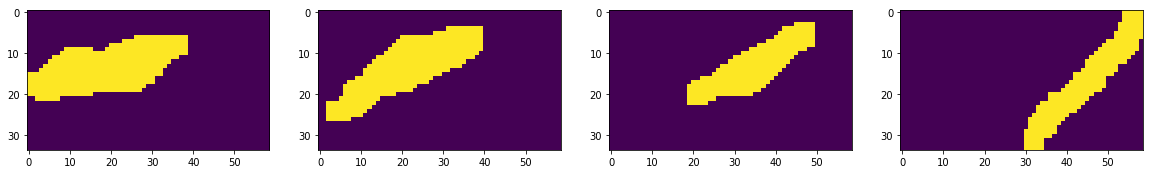

In [15]:
fig,ax = plt.subplots(1,4,figsize = (20,20))
for i in range(4):
    ax[i].imshow(s[i,:,:])


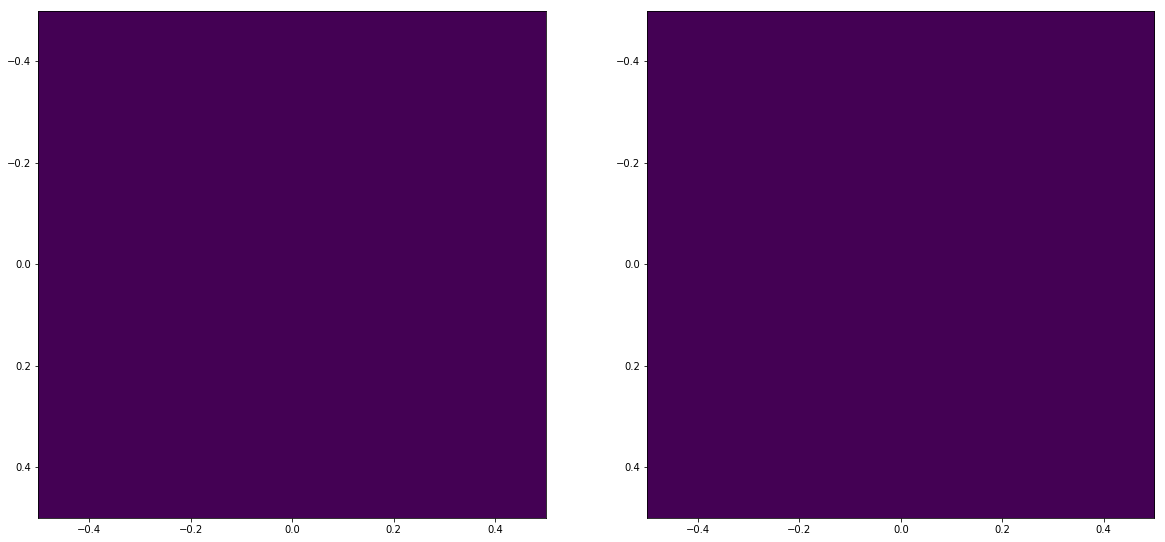

In [601]:
fig,ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(lb[0][zMIN,xMIN:xMAX+1,yMIN:yMAX+1])
ax[1].imshow(lb[0][zMAX,xMIN:xMAX+1,yMIN:yMAX+1])


In [155]:
scipy.misc.imsave('0.png', lb[0][14,xMIN:xMAX,yMIN:yMAX])

/home/siyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [156]:
scipy.misc.imsave('1.png', lb[0][14,:,:])

/home/siyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


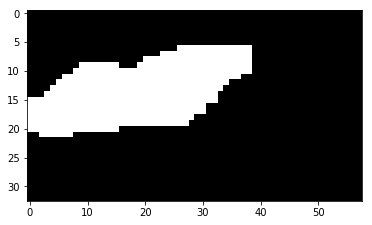

In [157]:
i = Image.open('/home/siyan/projects/cluster/0.png')
plt.imshow(i)

# (3) Rotation invarient feature - SIFT

In [158]:
import cv2

In [159]:
img = cv2.imread('/home/siyan/projects/cluster/0.png')

In [160]:
img2 = cv2.imread('/home/siyan/projects/cluster/1.png')

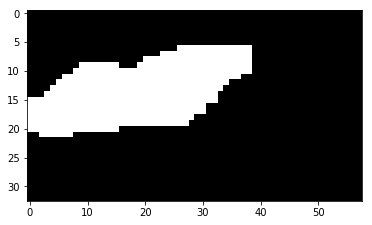

In [161]:
plt.imshow(img)

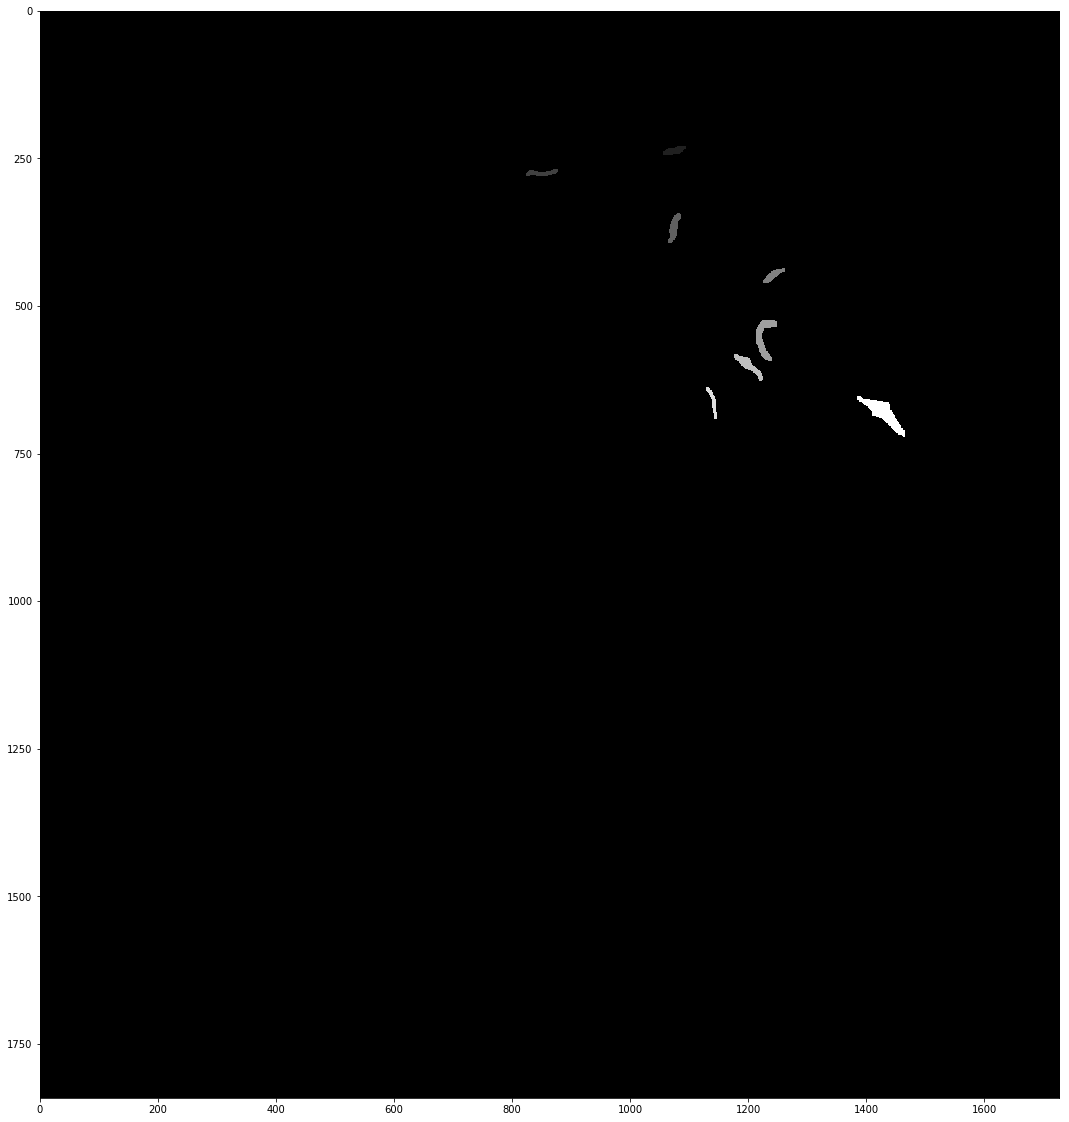

In [162]:
fig,ax = plt.subplots(1,1,figsize = (20,20))
ax.imshow(img2)

In [163]:
detector = cv2.xfeatures2d.SIFT_create()

In [164]:
detector2 = cv2.xfeatures2d.SIFT_create()

In [165]:
keypoints = detector2.detect(img,None)

In [166]:
keypoints

[<KeyPoint 0x7ffa79f82d20>,
 <KeyPoint 0x7ff8ea00f6f0>,
 <KeyPoint 0x7ff8ea00fcc0>,
 <KeyPoint 0x7ff8ea00f810>]

In [167]:
keypoints2 = detector.detect(img2,None)

In [168]:
keypoints2

[<KeyPoint 0x7ff8ea00f870>,
 <KeyPoint 0x7ff8ea00fb40>,
 <KeyPoint 0x7ff8ea00fa20>,
 <KeyPoint 0x7ff8ea00fb70>,
 <KeyPoint 0x7ff8ea00fc90>,
 <KeyPoint 0x7ff8ea00f990>,
 <KeyPoint 0x7ff8ea00f690>,
 <KeyPoint 0x7ff8ea00f900>,
 <KeyPoint 0x7ff8ea00fc00>,
 <KeyPoint 0x7ff8ea00f720>,
 <KeyPoint 0x7ff8ea00f9f0>,
 <KeyPoint 0x7ff8ea00fc60>,
 <KeyPoint 0x7ff8ea00fd50>,
 <KeyPoint 0x7ff8ea00fd20>,
 <KeyPoint 0x7ff8ea00fdb0>,
 <KeyPoint 0x7ff8ea00fd80>,
 <KeyPoint 0x7ff8ea00fde0>,
 <KeyPoint 0x7ff8ea00fe10>,
 <KeyPoint 0x7ff8ea00fe40>,
 <KeyPoint 0x7ff8ea00fe70>,
 <KeyPoint 0x7ff8ea00fea0>,
 <KeyPoint 0x7ff8ea00fed0>,
 <KeyPoint 0x7ff8ea00ff00>,
 <KeyPoint 0x7ff8ea00ff30>,
 <KeyPoint 0x7ff8ea00ff60>,
 <KeyPoint 0x7ffa8f87bc30>,
 <KeyPoint 0x7ffac96b8090>,
 <KeyPoint 0x7ffa7c71fbd0>,
 <KeyPoint 0x7ffa7c71fd20>,
 <KeyPoint 0x7ffa7a231f30>,
 <KeyPoint 0x7ffa7a231c30>,
 <KeyPoint 0x7ffa7a231a50>,
 <KeyPoint 0x7ff94e93d720>,
 <KeyPoint 0x7ff94e93d600>,
 <KeyPoint 0x7ff94e93dba0>,
 <KeyPoint 0x7ff94e9

In [169]:
img = cv2.drawKeypoints(img,keypoints,img)

In [170]:
img2 = cv2.drawKeypoints(img2,keypoints2,img2)

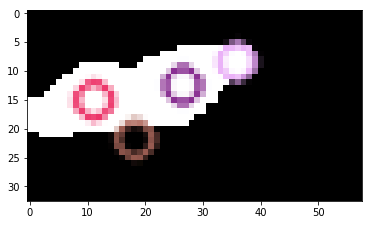

In [171]:
plt.imshow(img)

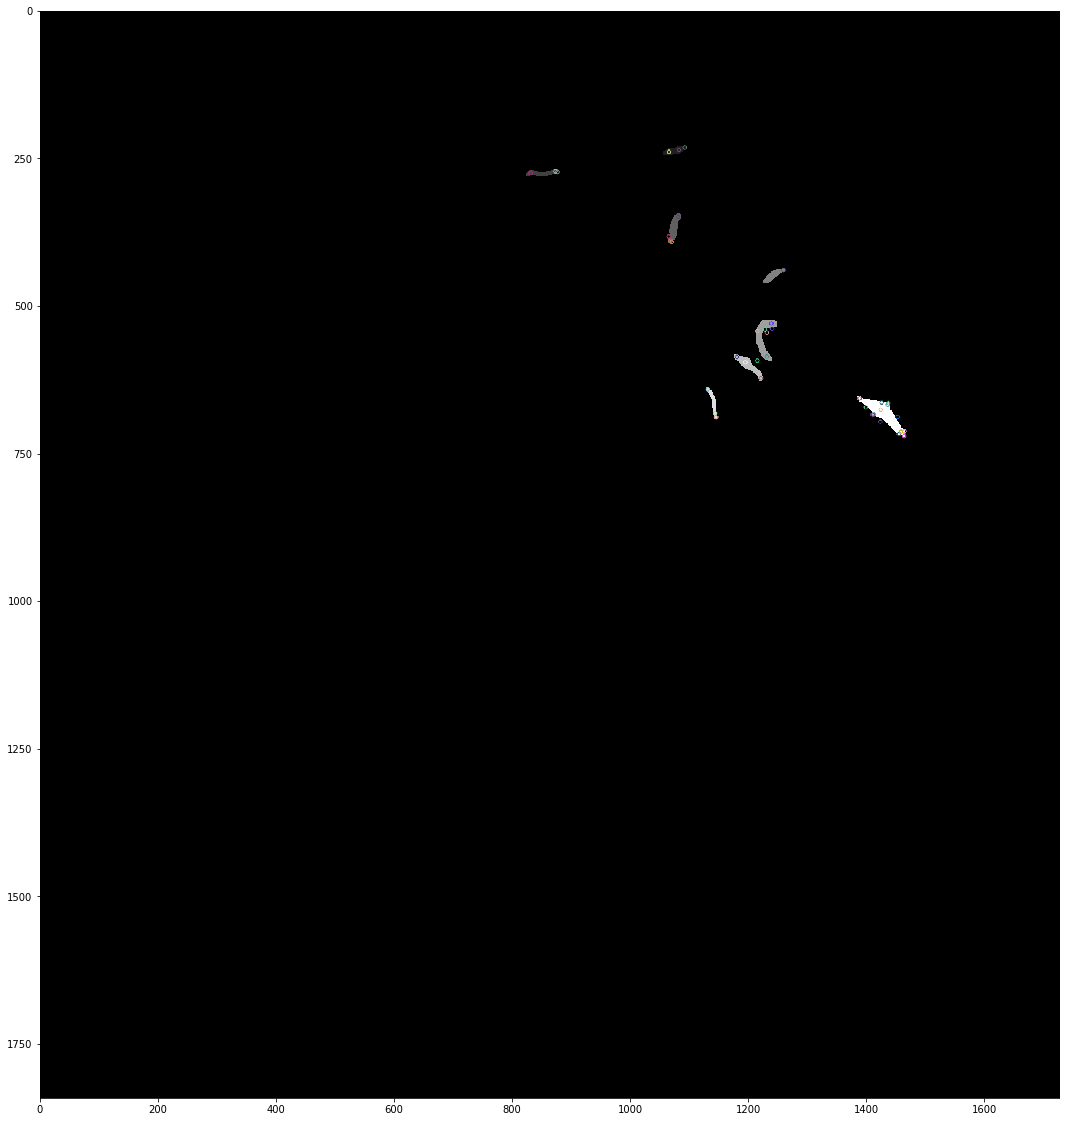

In [172]:
fig,ax = plt.subplots(1,1,figsize = (20,20))
ax.imshow(img2)

# (4) minimum bounding box

[3 2 1]
[3 2 1 3]
[0. 1. 1. 0.] [1. 1. 0. 1.] [0. 0. 0. 0.]
[3 1 0]
[3 1 0 3]
[0. 1. 0. 0.] [1. 0. 0. 1.] [0. 0. 0. 0.]
[5 1 0]
[5 1 0 5]
[1. 1. 0. 1.] [0. 0. 0. 0.] [1. 0. 0. 1.]
[5 4 0]
[5 4 0 5]
[1. 0. 0. 1.] [0. 0. 0. 0.] [1. 1. 0. 1.]
[7 3 0]
[7 3 0 7]
[0. 0. 0. 0.] [1. 1. 0. 1.] [1. 0. 0. 1.]
[7 4 0]
[7 4 0 7]
[0. 0. 0. 0.] [1. 0. 0. 1.] [1. 1. 0. 1.]
[6 2 1]
[6 2 1 6]
[1. 1. 1. 1.] [1. 1. 0. 1.] [1. 0. 0. 1.]
[6 5 1]
[6 5 1 6]
[1. 1. 1. 1.] [1. 0. 0. 1.] [1. 1. 0. 1.]
[6 3 2]
[6 3 2 6]
[1. 0. 1. 1.] [1. 1. 1. 1.] [1. 0. 0. 1.]
[6 7 3]
[6 7 3 6]
[1. 0. 0. 1.] [1. 1. 1. 1.] [1. 1. 0. 1.]
[6 5 4]
[6 5 4 6]
[1. 1. 0. 1.] [1. 0. 0. 1.] [1. 1. 1. 1.]
[6 7 4]
[6 7 4 6]
[1. 0. 0. 1.] [1. 1. 0. 1.] [1. 1. 1. 1.]


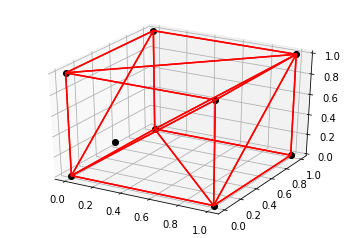

In [191]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

# 8 points defining the cube corners
pts = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1],[0.2,0.2,0.3]])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    print (s)
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    print (s)
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")
    print (pts[s, 0], pts[s, 1], pts[s, 2])

plt.show()

In [219]:
l3D = []

In [220]:
for i in l:
    for j in range(10):
        l3D.append([i[1],i[2],(i[0]-zMIN)*10+j])

In [595]:
np.array(l3D).shape

(13300, 3)

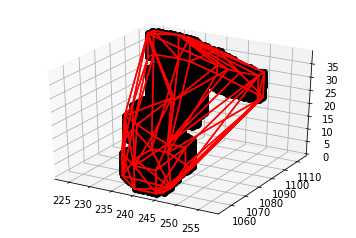

In [222]:
# 8 points defining the cube corners
pts = np.array(l3D)
edges = []

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    if ((s[0],s[1]) not in edges) and ((s[1],s[0]) not in edges):
        edges.append((s[0],s[1]))
    if ((s[1],s[2]) not in edges) and ((s[2],s[1]) not in edges):
        edges.append((s[1],s[2]))
    if ((s[0],s[2]) not in edges) and ((s[2],s[0]) not in edges):
        edges.append((s[0],s[2]))
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")
    
plt.show()

In [223]:
pts.shape

(13300, 3)

minimum bounding box

In [274]:
### this function is writen by nathanieltroutman. URL = nathanieltroutman.net/?q=content/calculating-minimum-volume-bounding-box
### many thanks to this implementation!
import sys
import numpy as np

def findOBBEdge(edges, points):
    # shift the points such that the minimum x, y, z values
    # in the entire set of points is 0.
    shift = points.min(axis=0)
    points = points - shift
    
    min_volume = sys.maxsize
    
    # try every pair of edges (ordering is not important)
    for idx, edge1_idx in enumerate(edges):        
        e1 = points[edge1_idx[0]] - points[edge1_idx[1]]
        for idx2, edge2_index in enumerate(edges[(idx+1):]):            
            e2 = points[edge2_index[0]] - points[edge2_index[1]]
            
            # transform the two edges into a orthogonal basis
            w = vec_cross(e1, e2) # returns normalized vector
            u = vec_cross(w, e1)
            v = vec_cross(u, w)
            
            # project all the points on to the basis u1, u2 u3
            p = calcProjections(points, u, v, w)

            volume, mins, maxes = calcVolume(p)
            
            # we are looking for the minimum volume box
            if volume <= min_volume:
                min_volume = volume
                specs = u, v, w, mins, maxes, volume
                
    u, v, w, mins, maxes, volume = specs
        
    # get the corner by using our projections, then shift it to move
    # it back into the same origin as the original set of points
    corner = u * mins[0] + v * mins[1] + w * mins[2]
    corner += shift
    
    # create the sides which are vectors with the magnitude the length
    # of that side
    v1 = u * (maxes[0] - mins[0])
    v2 = v * (maxes[1] - mins[1])
    v3 = w * (maxes[2] - mins[2])
    
    return corner, v1, v2, v3
    
def calcVolume(p):
    """Calculates the volume of the box that would encompass the given
    points using the given projection. projection is sized (NxM) where
    N is the number of points and M is the number of vectors they were
    projected onto. Also return the minimum and maximum bounds along
    each of those vectors."""
        
    # the minimum and maximum projection of each basis vector
    mins = p.min(axis=0)
    maxes = p.max(axis=0)
    
    # the volume product of each difference between the maximum and
    # minimum values from the projection onto each basis vector
    volume = np.prod(maxes - mins)
        
    return volume, mins, maxes  

def calcProjections(points, *vectors):
    """Calculates the projection of points (NxD) onto the vectors 
    (MxD) and return the projections p which is a matrix sized (N, M) 
    where N is the number of points and M is the number of vectors.
    p[i][j], is the projection of points[i] onto vectors[j] (which is
    between 0 and 1)."""
    
    u = np.array(vectors)
    
    # project the points onto the vectors into on fell swoop
    d = np.dot(points, u.T)
    
    # this is the dot product of each vector with itself
    v2 = np.diag(np.inner(u, u))
    
    p = d / v2
    
    return p
    
def vec_cross(u, v):
    """Return the normalized cross product of u and v."""
    w = np.cross(u, v)
    w = w/float(np.sqrt(np.sum(v**2)))
    return w

mbb = findOBBEdge(edges,pts)

/home/siyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in true_divide
/home/siyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide


In [275]:
mbb

(array([ 274.70108128, 1062.51629738,   28.95490548]),
 array([-24.65964704,  -1.08055321, -40.60542841]),
 array([-30.34566404,  59.00545785,  16.85870224]),
 array([-15.9302423 , -11.04076199,   9.96823083]))

In [302]:
u = (mbb[1][0]**2 + mbb[1][1]**2+mbb[1][2]**2)**0.5
v = (mbb[2][0]**2 + mbb[2][1]**2+mbb[2][2]**2)**0.5
w = (mbb[3][0]**2 + mbb[3][1]**2+mbb[3][2]**2)**0.5

In [303]:
u,v,w

(47.51911829783843, 68.45961746732145, 21.795335990046937)

In [276]:
p000 = mbb[0]
p100 = p000 + mbb[1]
p110 = p100 + mbb[2]
p101 = p100 + mbb[3]
p111 = p110 + mbb[3]
p010 = p000 + mbb[2]
p011 = p010 + mbb[3]
p001 = p000 + mbb[3]
P = np.array([p000,p100,p110,p101,p111,p010,p011,p001])

In [277]:
P

array([[ 274.70108128, 1062.51629738,   28.95490548],
       [ 250.04143425, 1061.43574417,  -11.65052294],
       [ 219.69577021, 1120.44120202,    5.20817931],
       [ 234.11119194, 1050.39498217,   -1.68229211],
       [ 203.76552791, 1109.40044003,   15.17641013],
       [ 244.35541724, 1121.52175523,   45.81360772],
       [ 228.42517494, 1110.48099324,   55.78183855],
       [ 258.77083898, 1051.47553539,   38.9231363 ]])

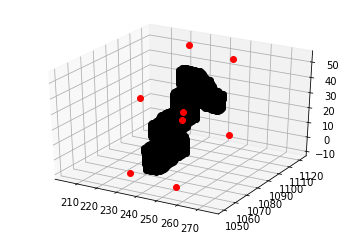

In [396]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax1.plot(pts.T[0], pts.T[1], pts.T[2], "ko")
ax1.plot(P.T[0], P.T[1], P.T[2], "ro")

# draw surface

# draw edge
#ax1.plot(P.T[[1,2],0],P.T[[1,2,3,1],1],P.T[[1,2,3,1],2],'r-')

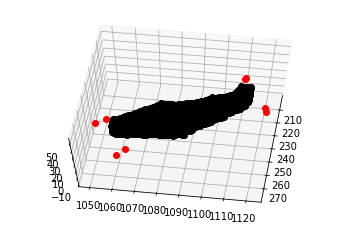

In [422]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax1.plot(pts.T[0], pts.T[1], pts.T[2], "ko")
ax1.plot(P.T[0], P.T[1], P.T[2], "ro")
ax1.view_init(elev=65., azim=8)

# draw surface

# draw edge
#ax1.plot(P.T[[1,2],0],P.T[[1,2,3,1],1],P.T[[1,2,3,1],2],'r-')

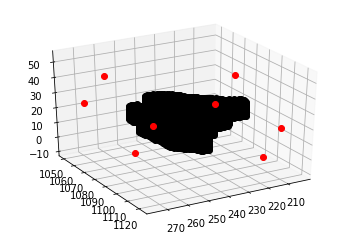

In [593]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax1.plot(pts.T[0], pts.T[1], pts.T[2], "ko")
ax1.plot(P.T[0], P.T[1], P.T[2], "ro")

ax1.view_init(elev=30, azim=60)
# draw surface

# draw edge
#ax1.plot(P.T[[1,2],0],P.T[[1,2,3,1],1],P.T[[1,2,3,1],2],'r-')

# (5) 2D skeleton

In [16]:
from skimage import morphology,draw
import cv2

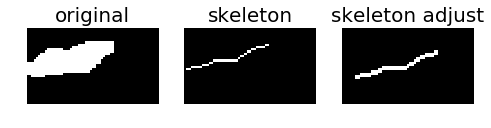

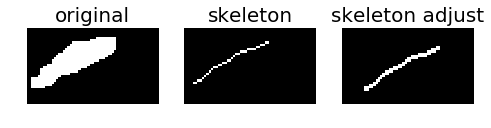

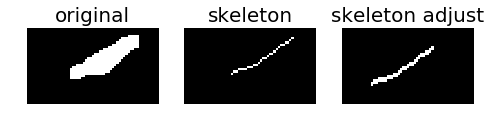

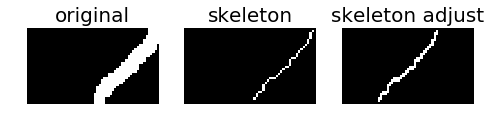

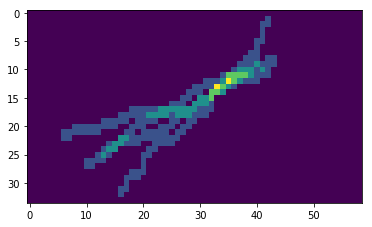

In [27]:
def point(image):
    img = np.uint8(image)
    contours = cv2.findContours(img.copy(),1,2)
    M= cv2.moments(contours[0]) #求矩
    cx = int(M['m10']/M['m00']) # 求x坐标
    cy = int(M['m01']/M['m00']) # 求y坐标
    return cx,cy

def adjust(skeleton,a,b):
    ske = np.uint8(skeleton)
    H = np.float32([[1,0,x/2 - a+15],[0,1,y/2 - b-13]])
    s = ske.shape 
    res = cv2.warpAffine(ske,H,(s[1],s[0])) #需要图像、变换矩阵、变换后的大小
    return res

x, y = lb[0][14,xMIN:xMAX+1,yMIN:yMAX+1].shape
sALL = np.zeros([x,y])
sAdjust = np.zeros([x,y])
for i in range(4):
    image = lb[0][14 + i,xMIN:xMAX+1,yMIN:yMAX+1]
    skeleton =morphology.skeletonize(image)
    a, b = point(image)
    sad = adjust(skeleton,a,b)
    sALL = sALL + skeleton
    sAdjust = sAdjust + sad

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('original', fontsize=20)

    ax2.imshow(skeleton, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('skeleton', fontsize=20)
    
    ax3.imshow(sad, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title('skeleton adjust', fontsize=20)

    plt.show()

plt.imshow(sAdjust)



projection to surfaces of the minimum bounding box

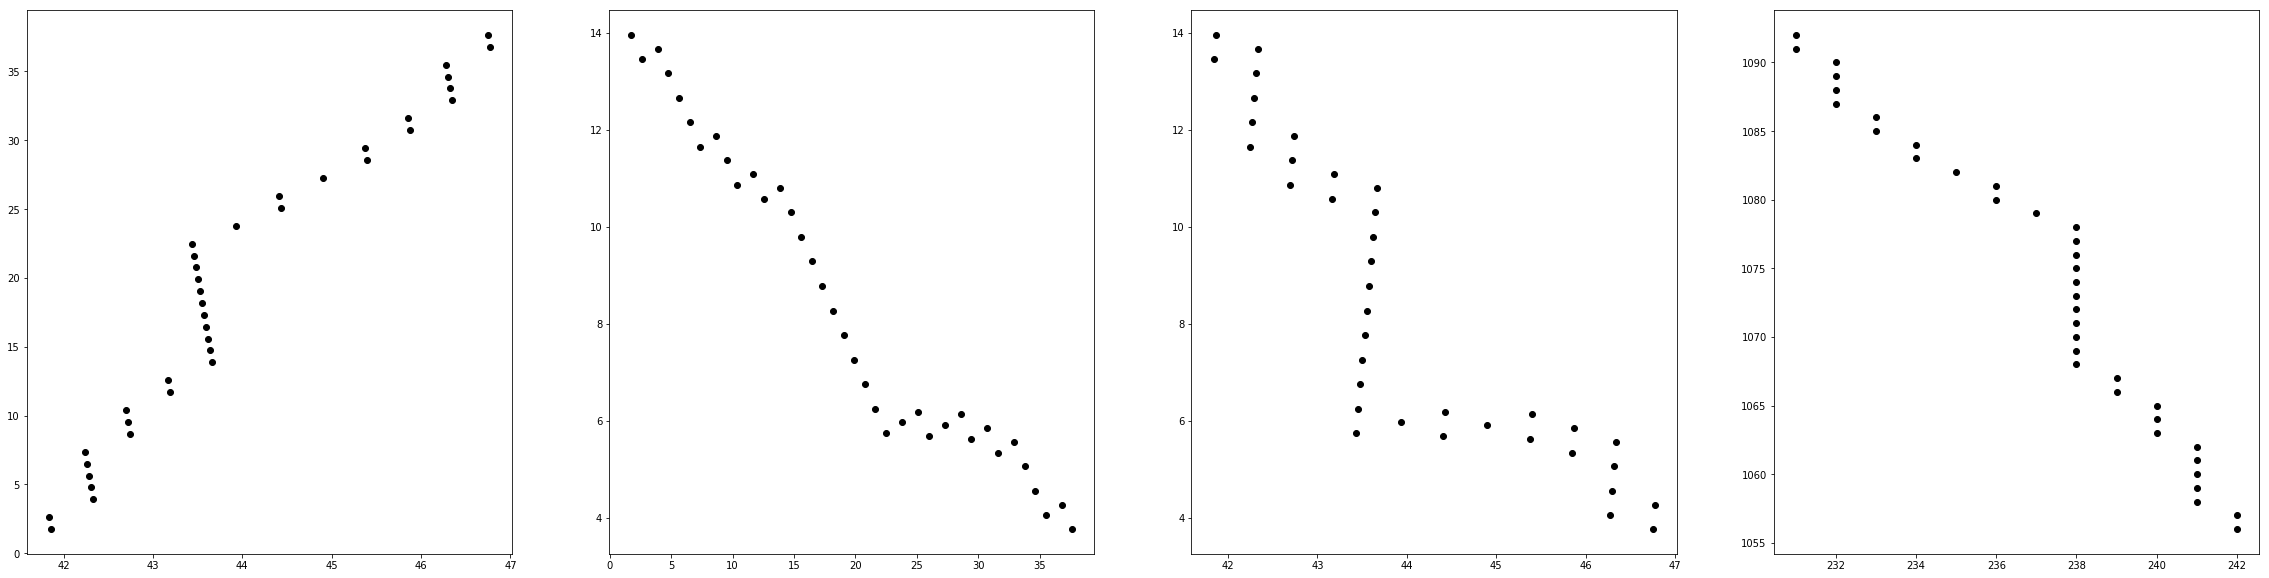

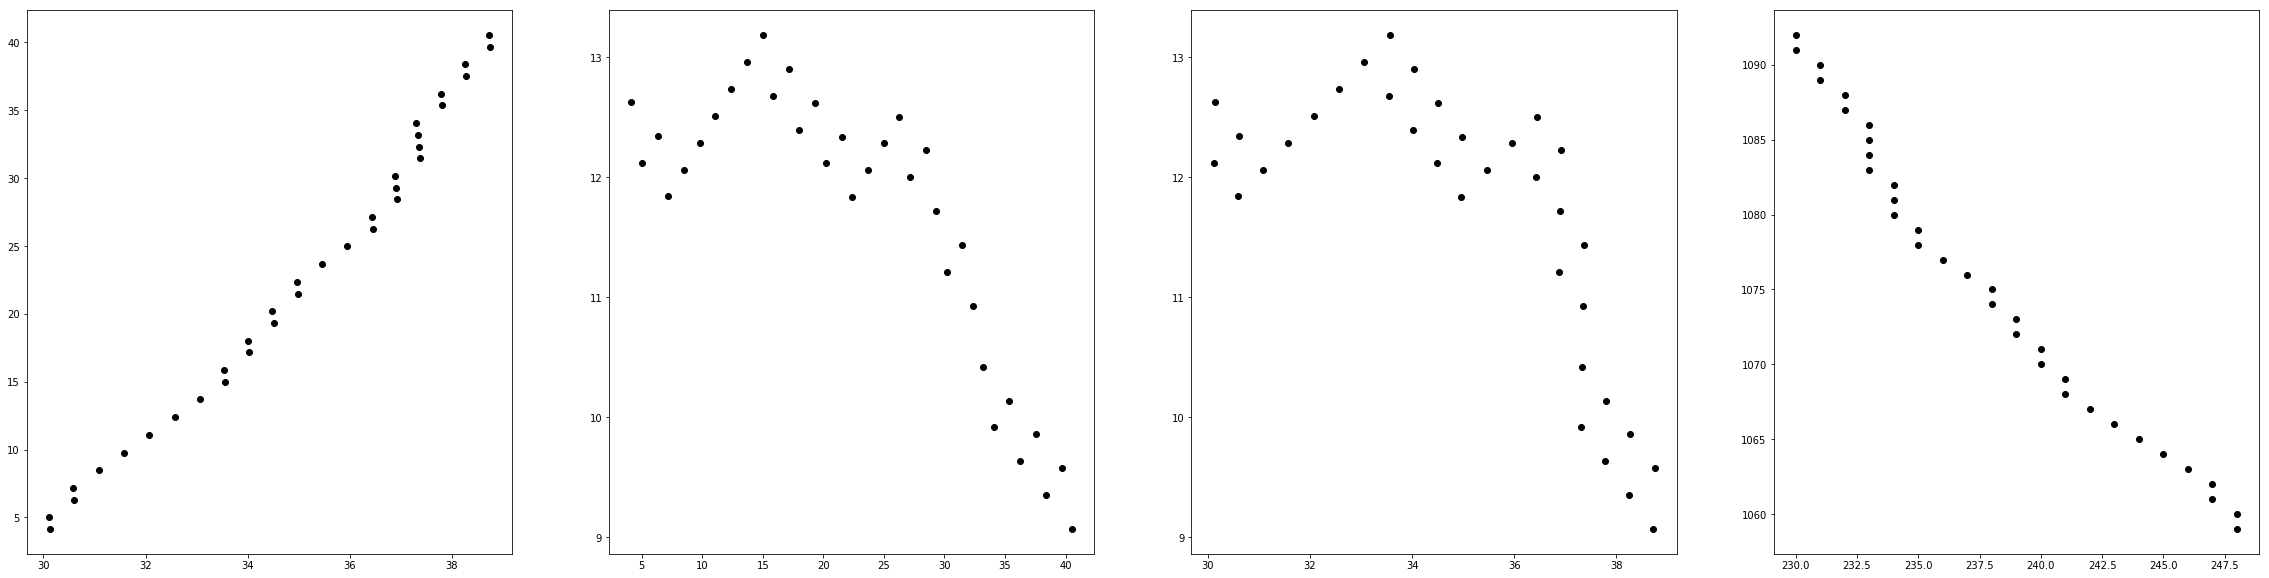

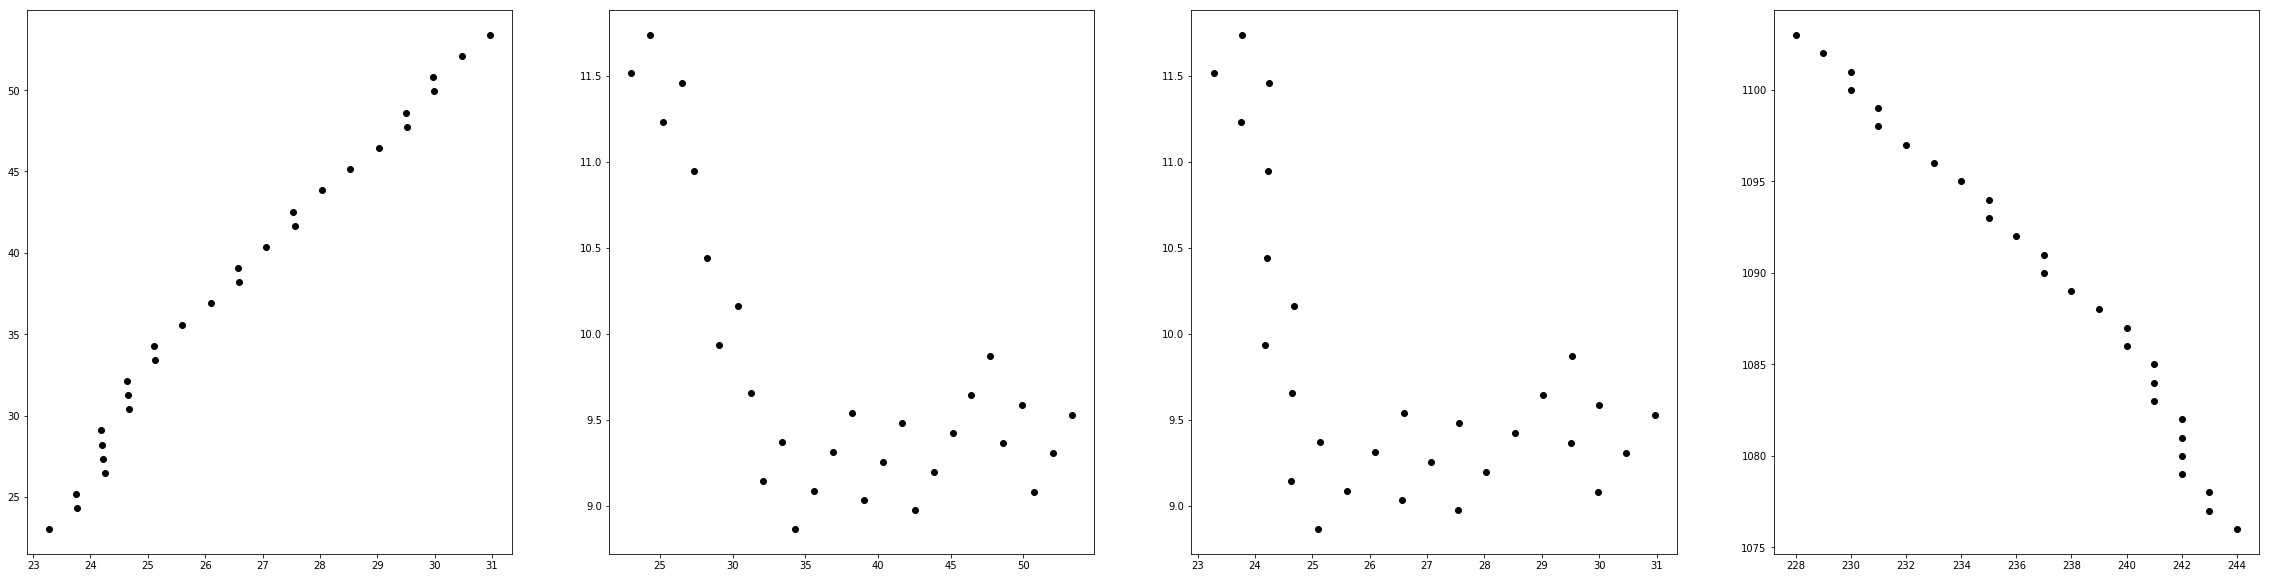

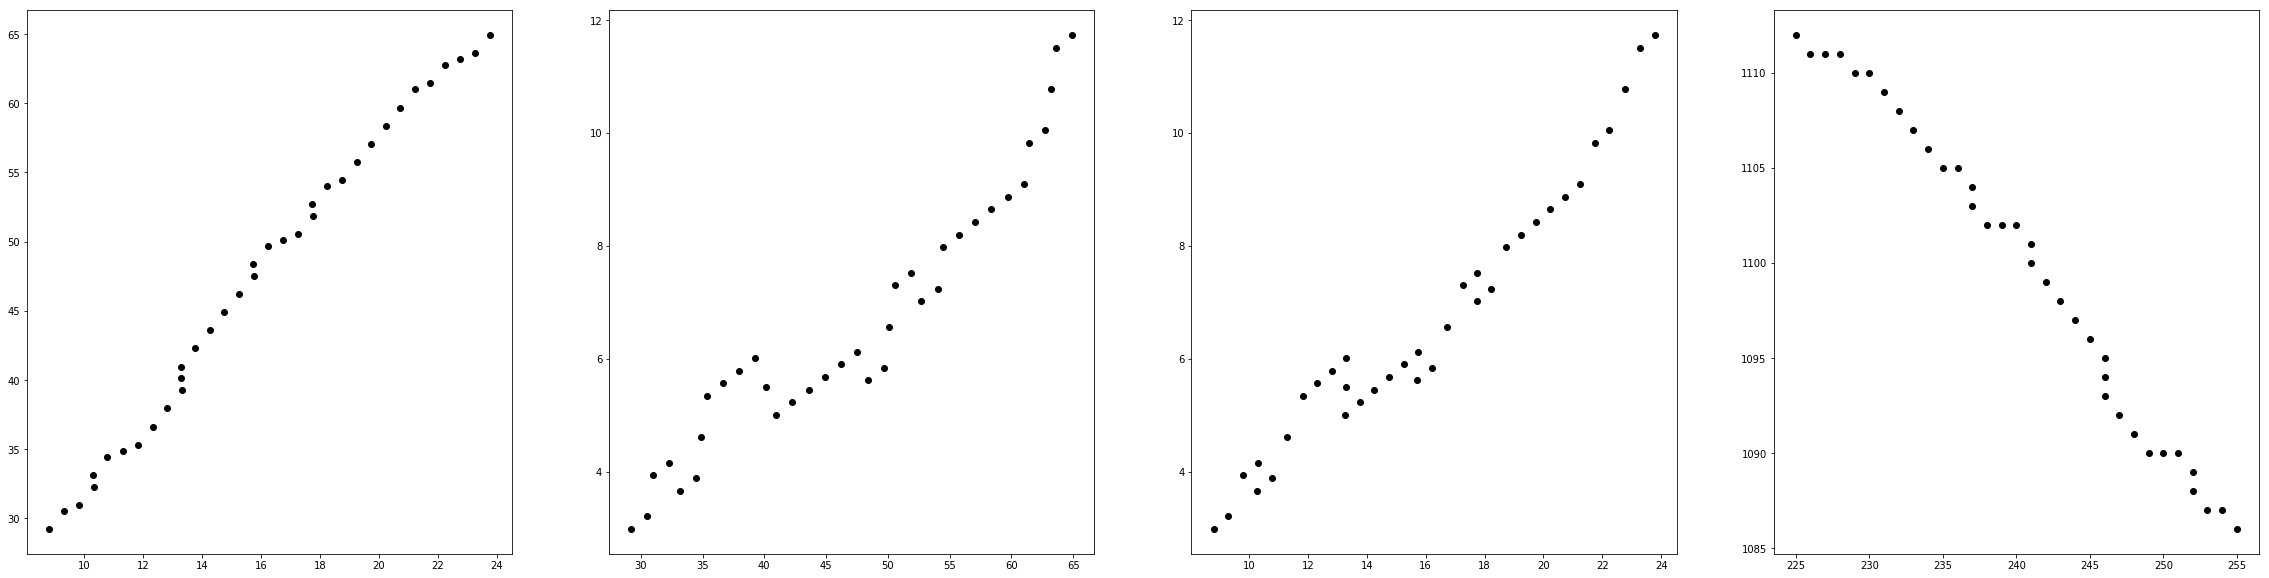

In [394]:
def augment(a):
    """Add a final column of ones to input data"""
    arr = np.ones((a.shape[0],a.shape[1]+1))
    arr[:,:-1] = a
    return arr

A = np.array([p000,p100,p010,p001])
B = np.array([[0,0,0],[u,0,0],[0,v,0],[0,0,w]])
T = np.linalg.inv(augment(A)).dot(B)

for i in range(4):
    sALL_z = []
    image = lb[0][14+i,xMIN:xMAX+1,yMIN:yMAX+1]
    skeleton =morphology.skeletonize(image)
    for j in range(skeleton.shape[0]):
        for k in range(skeleton.shape[1]):
            if skeleton[j][k] == True:
                sALL_z.append([j+xMIN,k+yMIN,10*i])
    S = augment(np.array(sALL_z))
    M= np.array(sALL_z)

    S_ = S.dot(T)

    fig, ax = plt.subplots(1, 4, figsize=(40, 10))
    ax[0].plot(S_.T[0], S_.T[1], "ko")
    ax[1].plot(S_.T[1], S_.T[2], "ko")
    ax[2].plot(S_.T[0], S_.T[2], "ko")
    ax[3].plot(M.T[0],M.T[1],"ko")

# (6) 3D skeleton

/home/siyan/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(40, 34, 59)


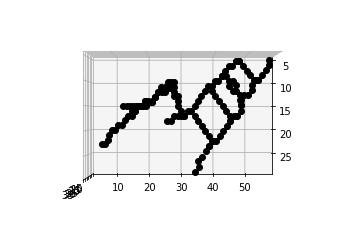

In [30]:
x, y = lb[0][14,xMIN:xMAX+1,yMIN:yMAX+1].shape
sALL = np.zeros([x,y])

image = lb[0][14:18,xMIN:xMAX+1,yMIN:yMAX+1]
M = np.empty((image.shape[0]*10,image.shape[1],image.shape[2]))
for i in range(4):
    for j in range(10):
        M[10*i+j,:,:] = image[i,:,:]

skeleton =morphology.skeletonize_3d(M)
print (skeleton.shape)
s = []
for i in range(skeleton.shape[0]):
    for j in range(skeleton.shape[1]):
        for k in range(skeleton.shape[2]):
            if skeleton[i,j,k] != 0:
                s.append([i,j,k])
    
s= np.array(s)

figs = plt.figure()
axs = figs.add_subplot(111, projection="3d")

axs.plot(s.T[1], s.T[2], s.T[0], "ko")
axs.view_init(elev=90, azim=0)

Conclusion: need smooth before 3d skeleton

# (7) 3D surface smooth

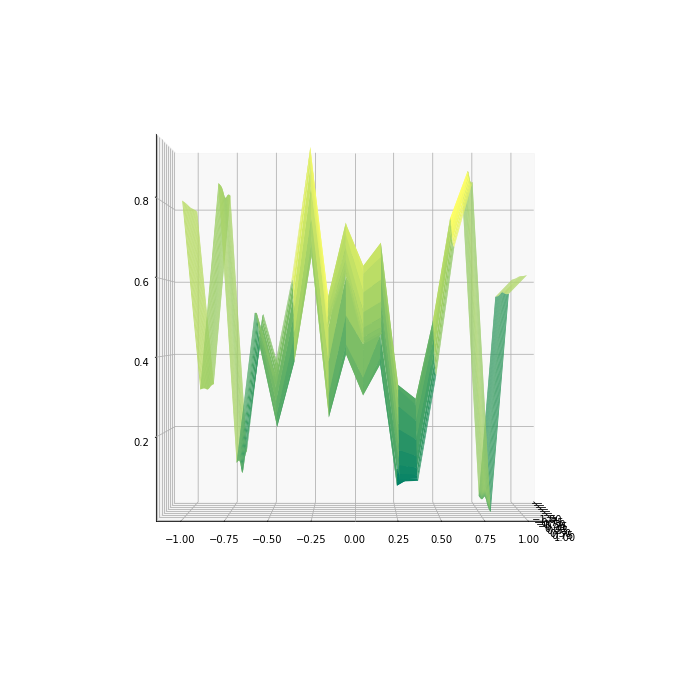

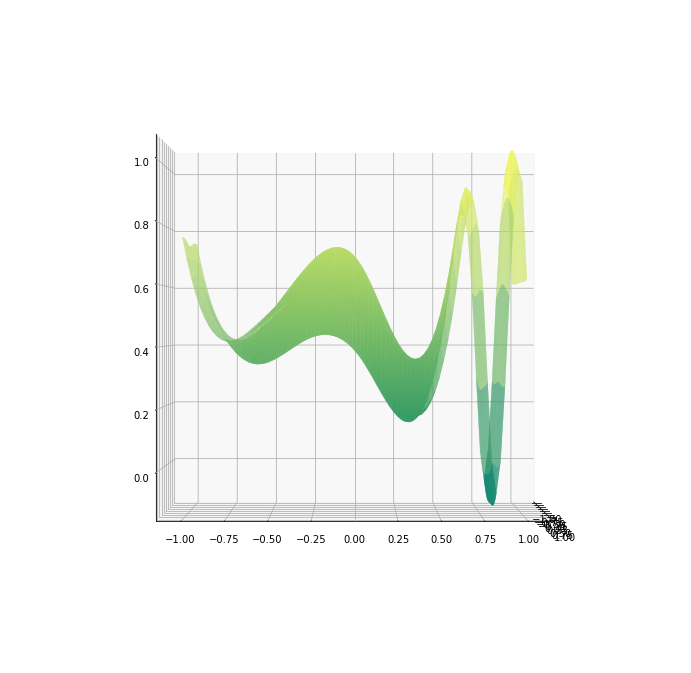

In [13]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

X, Y = np.mgrid[-1:1:20j, -1:1:20j]
Z = (X+Y) * np.exp(-6.0*(X*X+Y*Y)) + np.random.rand(X.shape[0])

xnew, ynew = np.mgrid[-1:1:80j, -1:1:80j]
tck = interpolate.bisplrep(X, Y, Z, s=10)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='summer', rstride=1, cstride=1, alpha=None)
ax.view_init(elev=0, azim=0)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_surface(xnew, ynew, znew, cmap='summer', rstride=1, cstride=1, alpha=None, antialiased=True)
ax.view_init(elev=0, azim=0)
plt.show()

In [589]:
tck = interpolate.bisplrep(pts.T[0], pts.T[1], pts.T[2], s=10)
znew = interpolate.bisplev(pts.T[0], pts.T[1], tck)

/home/siyan/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=23,23 m=13300 fp=40510095570.785385 s=10.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


ValueError: Invalid input data

/home/siyan/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


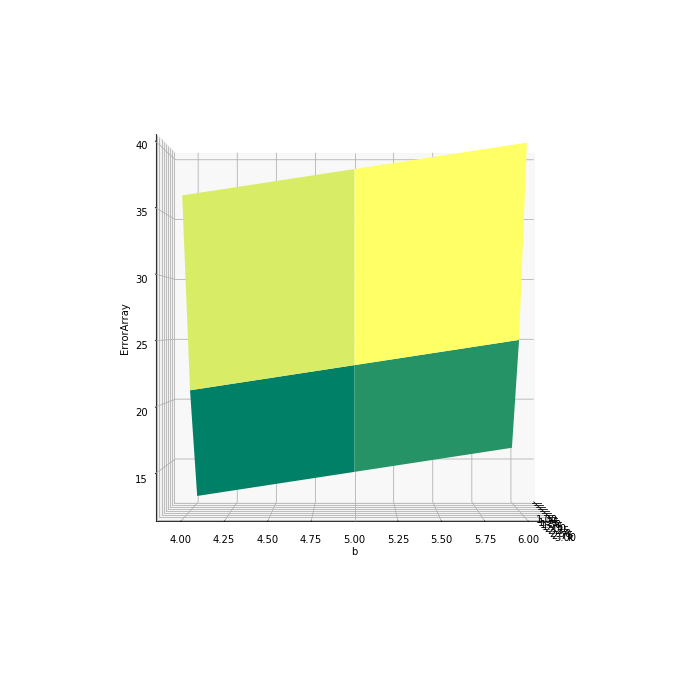

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

k,b=np.mgrid[1:3:3j,4:6:3j]
f_kb=3*k**2+2*b+1

#k.shape=-1,1
#b.shape=-1,1
#f_kb.shape=-1,1 #统统转成9行1列


fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_surface(k,b,f_kb, cmap='summer', rstride=1, cstride=1, alpha=None)
ax.set_xlabel('k')
ax.set_ylabel('b')
ax.set_zlabel('ErrorArray')
ax.view_init(elev=0, azim=0)
fig.show()

In [17]:
import numpy as np 

point_grid =np.array([[0.0,0.0,0.0],[0.4,0.4,0.4],[0.8,0.8,0.8],[1.0,1.0,1.0]])#网格点坐标

def func(x, y, z):
    return x*(1-x)*np.cos(4*np.pi*x) * (np.sin(4*np.pi*y**2)**2)*z

points = np.random.rand(10, 3)#实际点坐标
values = func(points[:,0], points[:,1],points[:,2])#实际点的值

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, point_grid, method='nearest')#插值计算，计算出网格点的值

values
#fig = plt.figure()
#ax1 = fig.add_subplot(111, projection="3d")
#ax1.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

In [21]:
grid_z0

array([-0.00028194,  0.01238916, -0.00064526, -0.00064526])